In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

# default plotting settings
plt.rc('figure', figsize=(11.69,8.27))  # din a4 size in inches

# Anomalies Maps

This notebook visualises **temperature** and **precipitation** anomalies for Europe and Northern Africa. I wish to plot quite recent data (December 2020 to August 2021), hence, I can't use [CRU TS](https://doi.org/10.1038/s41597-020-0453-3). Alternatively, the [ERA5](https://climatedataguide.ucar.edu/climate-data/era5-atmospheric-reanalysis) (atmospheric reanalysis) contains both temperature and precipitation data and is available until 2021/12. The dataset can be downloaded from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu/cdsapp#!/home).

In [8]:
# load data from netCDF file
era5_file = Dataset('../../data/ERA5/era5_global_tmp-pre_2020-21.nc')
print(era5_file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2022-03-17 18:07:08 GMT by grib_to_netcdf-2.24.2: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data5/adaptor.mars.internal-1647540411.612724-27331-10-e990a460-af27-4214-be71-4a7f10c1d599.nc /cache/tmp/e990a460-af27-4214-be71-4a7f10c1d599-adaptor.mars.internal-1647540375.5522451-27331-10-tmp.grib
    dimensions(sizes): longitude(3600), latitude(1801), time(24)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 t2m(time, latitude, longitude), int16 tp(time, latitude, longitude)
    groups: 


In [9]:
# variable information
cru_vars = [var for var in era5_file.variables]
for var in cru_vars:
    print('variable:', era5_file.variables[var],'\n')

variable: <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (3600,)
filling on, default _FillValue of 9.969209968386869e+36 used 

variable: <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (1801,)
filling on, default _FillValue of 9.969209968386869e+36 used 

variable: <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of -2147483647 used 

variable: <class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.0016708768689444869
    add_offset: 260.2578239243585
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current

In [17]:
# get the data
# NOTE: for now taking every 10th coord
t2m = era5_file.variables['t2m'][:,::10,::10]
lon = era5_file.variables['longitude'][::10]
lat = era5_file.variables['latitude'][::10]
print(t2m.shape)
print(lon.shape) # from -180 to 179
print(lat.shape) # from -90 to 90 (including 0°)

(24, 181, 360)
(360,)
(181,)


In [ ]:
# edge coordinates of map
top = 


t2m = t2m[:,]

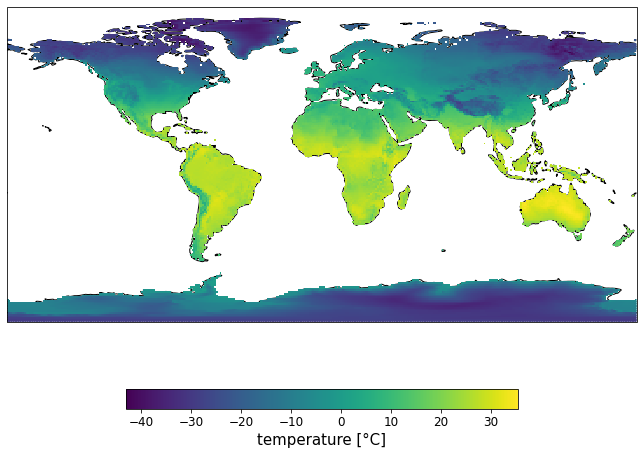

In [25]:
llon, llat = np.meshgrid(lon, lat)
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
pcm = ax.pcolormesh(lon, lat, t2m[0,:,:]-272.15) # alternatively: ax.contourf()
cb = fig.colorbar(pcm, orientation='horizontal', shrink=0.6)
cb.set_label('temperature [°C]', size=15)
cb.ax.tick_params(labelsize='large')

In [7]:
test = np.array([[[1,1,2], [2,3,3]], [[1,1,1], [1,1,1]]])
print(test.shape)
test[:,::2,::3]

(2, 2, 3)


array([[[1]],

       [[1]]])

In [12]:
1800*3600

6480000

In [13]:
180*360

64800